In [17]:
import numpy as np
import pandas as pd
from statistics import median
import matplotlib.pyplot as plt

import skimage
from skimage import io
from skimage import viewer
from skimage.measure import label, regionprops

In [19]:
adipo = io.imread("Img/crop1_adipo.tif", plugin="tifffile")

In [16]:
np.shape(adipo)

(59, 1484, 8400)

/usr/local/insa/anaconda/lib/python3.8/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


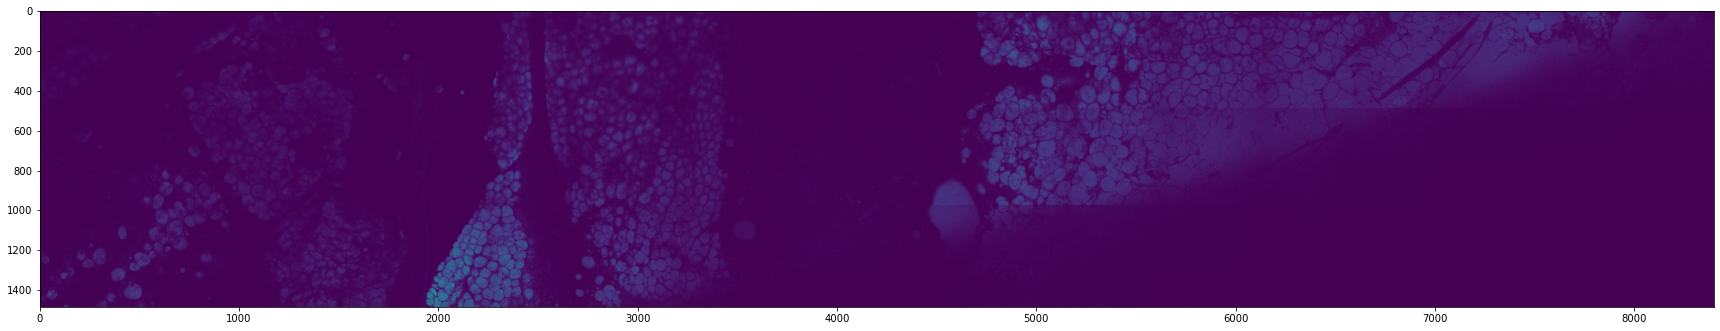

In [3]:
plt.figure(figsize=(30,10))
plt.imshow(adipo[30,:,:])
plt.show()

In [4]:
watershed = io.imread("Img/crop1_adipo_avg-watershed.tif", plugin="tifffile")

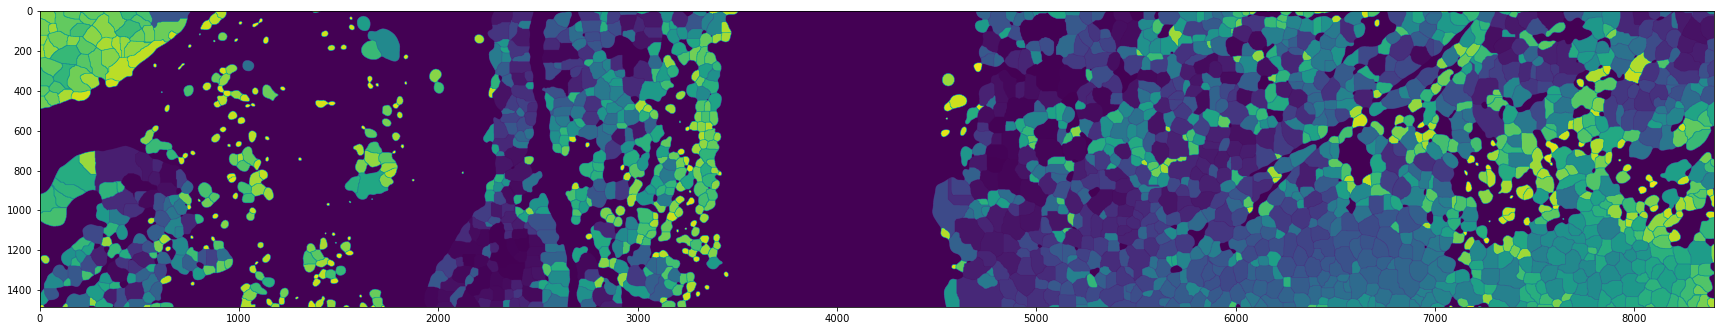

In [5]:
plt.figure(figsize=(30,10))
plt.imshow(watershed)
plt.show()

In [6]:
label_wtshd = label(watershed)
regions = regionprops(label_wtshd)

#### TO DO :
Clear data (area > threshold)

Repeat process on other images

In [8]:
# Get Properties

n = len(regions)
x_fascia = 4000

regions_l = []
regions_r = []

x_c = []
y_c = []

# Splitting the regions into 2 groups, left and right from the fascia. 

for props in regions:

    # Getting the centroids
    
    y0, x0 = props.centroid
    x_c.append(x0)
    y_c.append(y0)

    cond = x0 < x_fascia
    if (cond):
        regions_l.append(props)
    else:
        regions_r.append(props)
    
areas_l = []
eccent_l = []

# Getting the wanted properties from the two groups

for props in regions_l:
    
    # Areas
    a = props.area
    areas_l.append(a)
    
    # Eccentricity
    e = props.eccentricity
    eccent_l.append(e)
    
areas_r = []
eccent_r = []

for props in regions_r:
    
    # Areas
    a = props.area
    areas_r.append(a)
    
    # Eccentricity
    e = props.eccentricity
    eccent_r.append(e)

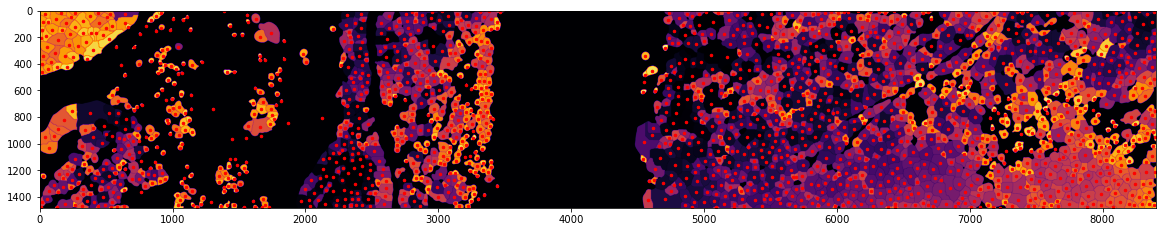

In [10]:
fig, ax = plt.subplots()
fig.set(figheight = 10)
fig.set(figwidth = 20)
ax.imshow(watershed, cmap = plt.cm.inferno)

plt.plot(x_c,y_c, '.r', markersize = 5)
plt.show()

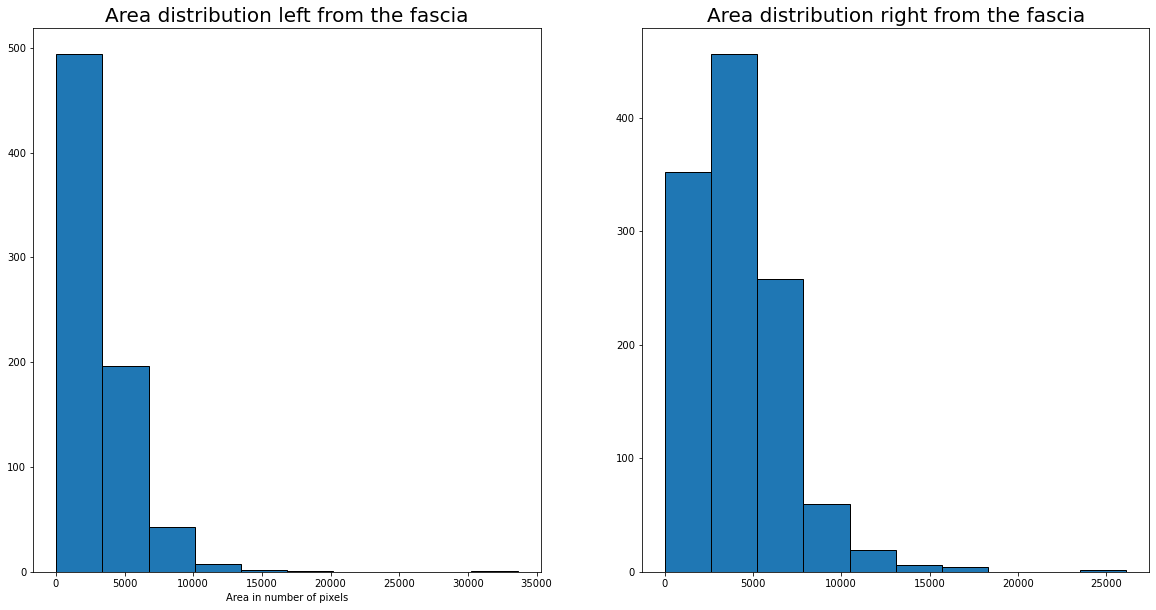

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

axs[0].hist(areas_l, color = 'tab:blue', edgecolor = 'k')
axs[0].set_title("Area distribution left from the fascia", size=20)
axs[0].set_xlabel("Area in number of pixels")


axs[1].hist(areas_r, color = 'tab:blue', edgecolor = 'k')
axs[1].set_title("Area distribution right from the fascia", size=20)


plt.show()

In [12]:
def Average(lst):
    return sum(lst)/len(lst)

In [13]:
Area_Average_l = Average(areas_l)
Area_Median_l = median(areas_l)

Area_Average_r = Average(areas_r)
Area_Median_r = median(areas_r)

print("Aire moyenne des régions à gauche du fascia :", Area_Average_l)
print("Aire moyenne des régions à droite du fascia :", Area_Average_r)

print("\nAire médiane des régions à gauche du fascia :", Area_Median_l)
print("Aire médiane des régions à droite du fascia :", Area_Median_r)

Aire moyenne des régions à gauche du fascia : 3027.3669354838707
Aire moyenne des régions à droite du fascia : 4237.683664649957

Aire médiane des régions à gauche du fascia : 2424.5
Aire médiane des régions à droite du fascia : 3696


In [14]:
Eccent_Median_l = median(eccent_l)

Eccent_Median_r = median(eccent_r)

print("Eccentricité médiane des régions à gauche du fascia :", Eccent_Median_l)
print("Eccentricité médiane des régions à droite du fascia :", Eccent_Median_r)


Eccentricité médiane des régions à gauche du fascia : 0.6801076650715716
Eccentricité médiane des régions à droite du fascia : 0.711445048840397
